## 取出label和id数据分别转为csv

In [73]:
import pickle    
import pandas as pd
data = pickle.load(open('train.pickle', 'rb'))

for i in range(len(data['text'])):
    data['id'][i] = data['id'][i][:]
    data['label'][i] = "real" if data['label'][i] == 1 else "fake"

lie1 = pd.DataFrame(columns = ['label'] , data=data['label'])
lie2 = pd.DataFrame(columns = ['id'] , data=data['id'])
df = pd.concat([lie1, lie2], axis=1)
df.to_csv("train_id_label.csv", encoding='utf-8', index=False)

In [74]:
import pickle    
import pandas as pd
data = pickle.load(open('test.pickle', 'rb'))

for i in range(len(data['text'])):
    data['id'][i] = data['id'][i][:]
    data['label'][i] = "real" if data['label'][i] == 1 else "fake"

lie1 = pd.DataFrame(columns = ['label'] , data=data['label'])
lie2 = pd.DataFrame(columns = ['id'] , data=data['id'])
df = pd.concat([lie1, lie2], axis=1)
df.to_csv("test_id_label.csv", encoding='utf-8', index=False)

In [75]:
import pickle    
import pandas as pd
data = pickle.load(open('validate.pickle', 'rb'))

for i in range(len(data['text'])):
    data['id'][i] = data['id'][i][:]
    data['label'][i] = "real" if data['label'][i] == 1 else "fake"

lie1 = pd.DataFrame(columns = ['label'] , data=data['label'])
lie2 = pd.DataFrame(columns = ['id'] , data=data['id'])
df = pd.concat([lie1, lie2], axis=1)
df.to_csv("validate_id_label.csv", encoding='utf-8', index=False)

## 读取

In [87]:
import pandas as pd

id_label = pd.read_csv('train_id_label.csv')
id_event = pickle.load(open('train_id.pickle', 'rb'))
id_label['event']=0

## 字典匹配id 插入事件列

In [88]:
import numpy as np

# 转为numpy
id_label_event = np.array(id_label)

# 匹配event
for idx, row in enumerate(id_label_event):
    id_label_event[idx,2] = id_event[str(row[1])]

# 输出csv
pd_data = pd.DataFrame(id_label_event, columns=['label','id','event'])
pd_data.to_csv('train_i_l_e.csv')

In [89]:
pd_data['label'].value_counts()

real    2898
fake    2517
Name: label, dtype: int64

In [90]:
pd_data['event'].value_counts()

6     1273
28     975
29     930
2      925
0      381
11     328
26     320
23     139
3       83
21      61
Name: event, dtype: int64

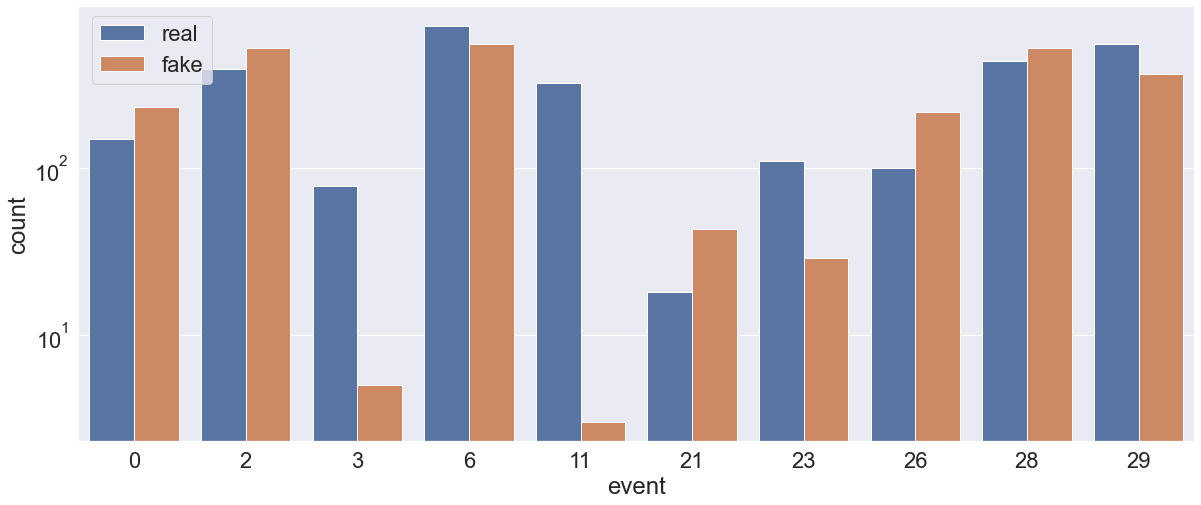

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

plt.figure(figsize=(20, 8))
sns.set(font_scale=2)
ax = sns.countplot(x="event", hue="label", data=pd_data)
ax.set_yscale("log")

# 调整图例位置（靠左距离，靠下距离）
ax.legend(loc='center right', bbox_to_anchor=(0.13,0.90), ncol=1)

plt.show()

In [42]:
import pickle    
import pandas as pd
data = pickle.load(open('train.pickle', 'rb'))

for i in range(len(data['text'])):
    data['text'][i] = data['text'][i][:-1]
    data['id'][i] = data['id'][i][:]
    data['label'][i] = "real" if data['label'][i] == 1 else "fake"


lie1 = pd.DataFrame(columns = ['id'] , data=data['id'])
lie2 = pd.DataFrame(columns = ['text'] , data=data['text'])
lie3 = pd.DataFrame(columns = ['label'] , data=data['label'])
df = pd.concat([lie1, lie2, lie3], axis=1)
df.to_csv("train_id_text_label.csv", encoding='utf-8', index=False)

In [43]:
import pandas as pd

id_label = pd.read_csv('train_id_text_label.csv')
id_event = pickle.load(open('train_id.pickle', 'rb'))
id_label['event']=0

import numpy as np
# 转为numpy
id_label_event = np.array(id_label)

# 匹配event
for idx, row in enumerate(id_label_event):
    id_label_event[idx,3] = id_event[str(row[0])]

# 输出csv
pd_data = pd.DataFrame(id_label_event, columns=['id','text','label','event'])
pd_data.to_csv('train_i_t_l_e.csv',index=0)

## 单独输出事件的推文

In [88]:
df = pd.read_csv('train_i_t_l_e.csv')
df = df[df['event'] == 29]
df['text'].to_csv('事件29.csv',index=0)